In [ ]:
pwd

'/content/drive/MyDrive/data for NN'

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
cd '/content/drive'

/content/drive


In [7]:
cd MyDrive

/content/drive/MyDrive


In [8]:
ls

'AI Against .gslides'  'How to get started with Drive.pdf'
'Colab Notebooks'/      Millionaires.gslides
'data for NN'/          tetrahymena2.tsv


In [9]:
cd data\ for\ NN

/content/drive/MyDrive/data for NN


In [10]:
import pandas as pd

In [11]:
pd.read_csv('PimaIndiansDiabetes.csv')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint

In [13]:

np.random.seed(69)


In [14]:
model = Sequential()
dataset = pd.read_csv("PimaIndiansDiabetes.csv")

In [15]:
import statistics as stat

In [16]:
Pregnancies = dataset.loc[:,"Pregnancies"]
Glucose = dataset.loc[:,"Glucose"]
BP = dataset.loc[:,"BloodPressure"]
ST = dataset.loc[:,"SkinThickness"]
Insulin = dataset.loc[:,"Insulin"]
BMI = dataset.loc[:,"BMI"]
DPF = dataset.loc[:,"DiabetesPedigreeFunction"]
Age = dataset.loc[:,"Age"]
Outcome = dataset.loc[:,"Outcome"]



Insulin = Insulin.replace(to_replace= 0, value= stat.mean(Insulin))
Glucose = Glucose.replace(to_replace= 0, value= stat.mean(Glucose))
BP = BP.replace(to_replace= 0, value= stat.mean(BP))
ST = ST.replace(to_replace= 0, value= stat.mean(ST))
BMI = BMI.replace(to_replace= 0, value= stat.mean(BMI))
DPF = DPF.replace(to_replace= 0, value= stat.mean(DPF))

Insulin

0       79.799479
1       79.799479
2       79.799479
3       94.000000
4      168.000000
          ...    
763    180.000000
764     79.799479
765    112.000000
766     79.799479
767     79.799479
Name: Insulin, Length: 768, dtype: float64

In [17]:
x = dataset.iloc[:, :-1].values
y = dataset. iloc [:, -1].values

In [18]:
import sklearn
from sklearn.model_selection import train_test_split
from keras import regularizers
from keras.layers import Dropout

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0, test_size = 0.2)

In [20]:
model.add(Dense(12, input_dim=8,  activation='relu'))
model.add(Dense(4, activation='relu',
                input_dim=18,
                kernel_regularizer=regularizers.l2(0.5),
                activity_regularizer=regularizers.l1(0.5)))
model.add(Dropout(0.7))
model.add(Dense(1,  activation='sigmoid' ))

model.compile(loss='binary_crossentropy',
            optimizer='FTRL',
            metrics=['accuracy'])


In [26]:
ckpt_model = 'pima-weights.best.hdf5'
checkpoint = ModelCheckpoint(ckpt_model,
                           monitor='val_acc',
                           verbose=1,
                           save_best_only=True,
                           mode='max')
callbacks_list = [checkpoint]

print('Starting training...')
history = model.fit(x_train,
                   y_train,
                   validation_data=(x_test, y_test),
                   epochs=10,
                   batch_size=10,
                   callbacks=callbacks_list,
                   verbose=1)

Starting training...
Epoch 1/10
54/62 [=========================>....] - ETA: 0s - loss: 3.3023 - accuracy: 0.6074

62/62 [==============================] - 0s 7ms/step - loss: 3.3001 - accuracy: 0.6189 - val_loss: 3.2405 - val_accuracy: 0.6494
Epoch 2/10
54/62 [=========================>....] - ETA: 0s - loss: 3.2822 - accuracy: 0.6204

62/62 [==============================] - 0s 8ms/step - loss: 3.2424 - accuracy: 0.6189 - val_loss: 3.1512 - val_accuracy: 0.6494
Epoch 3/10
58/62 [===========================>..] - ETA: 0s - loss: 3.2170 - accuracy: 0.6207

62/62 [==============================] - 0s 8ms/step - loss: 3.2611 - accuracy: 0.6221 - val_loss: 3.0700 - val_accuracy: 0.6623
Epoch 4/10
53/62 [========================>.....] - ETA: 0s - loss: 3.0585 - accuracy: 0.6396

62/62 [==============================] - 1s 9ms/step - loss: 3.0555 - accuracy: 0.6384 - val_loss: 3.0072 - val_accuracy: 0.6753
Epoch 5/10
51/62 [=======================>......] - ETA: 0s - loss: 2.9745 - accuracy: 0.6392

62/62 [==============================] - 0s 3ms/step - loss: 2.9041 - accuracy: 0.6433 - val_loss: 2.9556 - val_accuracy: 0.6753
Epoch 6/10
47/62 [=====================>........] - ETA: 0s - loss: 2.9562 - accuracy: 0.6362

62/62 [==============================] - 0s 3ms/step - loss: 2.9554 - accuracy: 0.6384 - val_loss: 2.9075 - val_accuracy: 0.6883
Epoch 7/10
54/62 [=========================>....] - ETA: 0s - loss: 2.7770 - accuracy: 0.6204

62/62 [==============================] - 0s 4ms/step - loss: 2.8433 - accuracy: 0.6319 - val_loss: 2.8649 - val_accuracy: 0.6883
Epoch 8/10
57/62 [==========================>...] - ETA: 0s - loss: 2.8996 - accuracy: 0.6333

62/62 [==============================] - 0s 3ms/step - loss: 2.8683 - accuracy: 0.6352 - val_loss: 2.8271 - val_accuracy: 0.6883
Epoch 9/10
55/62 [=========================>....] - ETA: 0s - loss: 2.9325 - accuracy: 0.6309

62/62 [==============================] - 0s 3ms/step - loss: 2.8749 - accuracy: 0.6336 - val_loss: 2.7930 - val_accuracy: 0.6883
Epoch 10/10
53/62 [========================>.....] - ETA: 0s - loss: 2.7284 - accuracy: 0.6415

62/62 [==============================] - 0s 3ms/step - loss: 2.7127 - accuracy: 0.6466 - val_loss: 2.7651 - val_accuracy: 0.6883


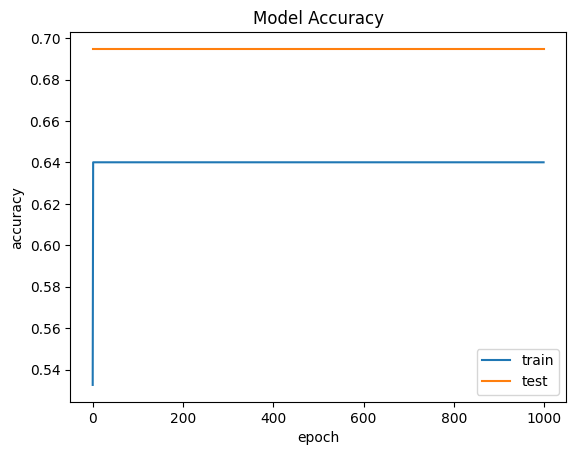

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()


In [ ]:
scores = model.evaluate(x_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))


accuracy: 69.48%


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn import datasets

In [22]:
x, y = datasets.load_iris(return_x_y=True)

clf = DecisionTreeClassifier(random_state=42)

k_folds = KFold(n_splits = 5)

scores = cross_val_score(clf, x, y, cv = k_folds)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))


NameError: ignored

In [27]:
cv = 5
folds = np.array_split(dataset, cv)
c= np.array([])
Y = dataset[::-1]
X = dataset[::-1]
for i in range(cv):
       train = list(folds)

       test = folds[i]
       Y_Test= test.iloc[:,-1]
       X_Test=  test.iloc[:,:-1]
       del train[i]
       train = pd.concat(train, sort=False)
       Y_Train= train.iloc[:,-1]
       X_Train= train.iloc[:,:-1]
       history = model.fit(X_Train,
                   Y_Train,
                   validation_data=(X_Test, Y_Test),
                   epochs=50,
                   batch_size=17,
                   callbacks=callbacks_list,
                   verbose=0)
       scores = model.evaluate(X_Test, Y_Test, verbose=0)
       c= np.append(c, scores[1])
average_accuracy= c.sum()/cv
average_accuracy


0.6394703388214111